# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [67]:
# Import your libraries
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import binom
from scipy.stats import poisson
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [55]:
# Your code here
sample_size=[10, 50, 500, 5000]
muestras = []
for sam in sample_size:
    muestras.append(np.random.normal(50, 5, size=sam))

for mu in muestras:
    k2, p = stats.normaltest(mu)
    print('k2= '+str(k2),' p= '+str(p))

k2= 1.8444911547701983  p= 0.39762513977623803
k2= 1.3402399619729706  p= 0.5116471861695735
k2= 2.286246743733993  p= 0.3188216664476866
k2= 0.5288804414317139  p= 0.76763553619884


#### Interpret the normaltest results and make your observations.

In [90]:
# Explain the test results here
'''Cuanto mayor es el tamaño muestral, más confianza en que la media se aproxime a la que hemos establecido.

En otras palabras, queda refutada la hipótesis nula "los numeros se disfribuyen de forma normal" '''

'Cuanto mayor es el tamaño muestral, más confianza en que la media se aproxime a la que hemos establecido.\n\nEn otras palabras, queda refutada la hipótesis nula "los numeros se disfribuyen de forma normal" '

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

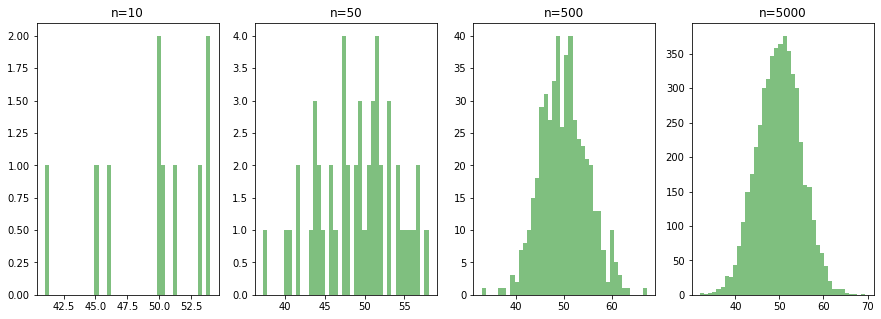

In [65]:
# Your code here
fig, ax = plt.subplots(1,4)
fig.set_size_inches(15,5)
i=0
for mu in muestras:
    ax[i].hist(mu, bins=40, alpha = 0.5, color='green')
    ax[i].set_title('n='+str(len(mu)))
    i+=1
plt.show()

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [91]:
# Your comment and explanation here
'''Cuanto mayor es la muestra  más se concentran los valores medios en el centro de nuestra distribución'''

'Cuanto mayor es la muestra  más se concentran los valores medios en el centro de nuestra distribución'

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

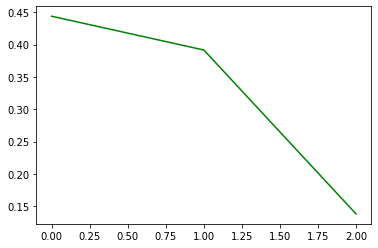

In [86]:
# Your code here
fig, ax = plt.subplots(1, 1)
n, p = 5, 0.15

x = np.arange(binom.ppf(0.01, n, p),binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), '-', color='green')
plt.show()

#### Explain what you observe from the plot above

In [92]:
# Your comment here
'''La probabilidad es muy baja para que el tamaño de la muestra arroje resultados con sentido'''

'La probabilidad es muy baja para que el tamaño de la muestra arroje resultados con sentido'

#### Now plot PMF with 50, 500, and 5000 visitors.

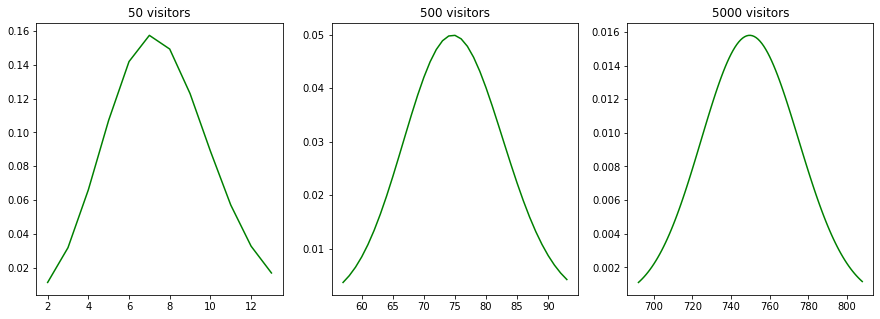

In [88]:
# Your code here
fig, ax = plt.subplots(1, 3)
sizes, p = [50,500,5000], 0.15
fig.set_size_inches(15,5)

i=0
for n in sizes:
    x = np.arange(binom.ppf(0.01, n, p),binom.ppf(0.99, n, p))
    ax[i].plot(x, binom.pmf(x, n, p), '-', color='green')
    ax[i].set_title(str(n)+' visitors')
    i+=1
plt.show()

#### What did you notice from the distribution plots? Comment your findings.

In [93]:
# Your comment here
'''Con estos tamaños muestrales ya podemos afirmar que existe una media y una desviación típica para nuestras distribuciones'''

'Con estos tamaños muestrales ya podemos afirmar que existe una media y una desviación típica para nuestras distribuciones'

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [94]:
# Your comment here
'''Esta distribución parte de una frecuencia de que ocurra un suceso e indica la probabilidad de que ocurra ese suceso durante un periodo de tiempo'''

'Esta distribución parte de una frecuencia de que ocurra un suceso e indica la probabilidad de que ocurra ese suceso durante un periodo de tiempo'

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [101]:
# Your code here
mu = 300
x = 320
poisson.pmf(x, mu)



0.011612348610402475

#### What is the probability of getting 60 visits?

In [100]:
# Your code here

mu = 300
x = 60
poisson.pmf(x, mu)


2.622743762294515e-64

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

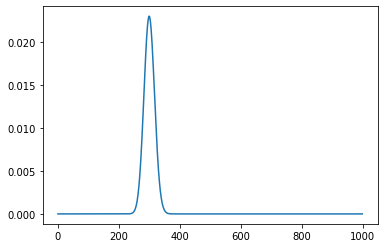

In [98]:
# your code here
fig, ax = plt.subplots(1, 1)
mu=300

x = np.arange(1000)
ax.plot(x, poisson.pmf(x, mu), '-')
plt.show()